# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [20]:
# Take make moons in built dataset

data_ = datasets.make_moons()

In [58]:
# check the dataset

data_


(array([[ 1.87131870e+00,  9.28244800e-03],
        [ 9.03976974e-01, -4.95379113e-01],
        [ 1.46253829e+00, -3.86599306e-01],
        [ 9.26916757e-01,  3.75267005e-01],
        [ 1.83808810e+00, -4.55349012e-02],
        [ 1.62348980e+00, -2.81831482e-01],
        [ 1.59599895e-01,  9.87181783e-01],
        [ 3.20515776e-02,  9.99486216e-01],
        [-7.18349350e-01,  6.95682551e-01],
        [ 1.51839257e+00, -3.55142763e-01],
        [ 1.34536505e+00, -4.38468422e-01],
        [-5.18392568e-01,  8.55142763e-01],
        [-2.22520934e-01,  9.74927912e-01],
        [ 5.09442530e-02,  1.84891782e-01],
        [ 9.81559157e-01,  1.91158629e-01],
        [ 6.23489802e-01,  7.81831482e-01],
        [ 9.91790014e-01,  1.27877162e-01],
        [-1.00000000e+00,  1.22464680e-16],
        [-4.04783343e-01,  9.14412623e-01],
        [ 1.57211666e+00, -3.20172255e-01],
        [-8.71318704e-01,  4.90717552e-01],
        [ 5.37461710e-01, -3.86599306e-01],
        [ 5.95216657e-01, -4.144

In [22]:
# create input dataframe

inputData = pd.DataFrame(data = data_[0])

In [23]:
inputData.head()

,0,1
0,1.871319,0.009282
1,0.903977,-0.495379
2,1.462538,-0.386599
3,0.926917,0.375267
4,1.838088,-0.045535


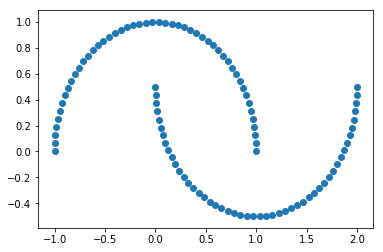

In [24]:
# create a scatter plot for inputData set
plt.scatter(inputData[0], inputData[1])

In [25]:
# create output dataframe

outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,1
1,1
2,1
3,0
4,1


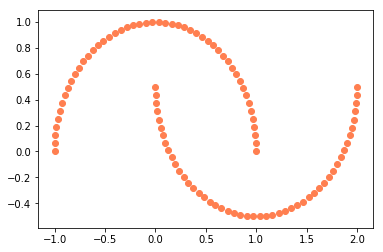

In [70]:
# create a scatter plot for inputData set with outputData colors

plt.scatter(inputData[0], inputData[1], c = 'coral')


In [61]:
# Call the sklearn Kmeans and make a model with 200 samples

#model_fit
data_ = datasets.make_moons(n_samples=200)
inputData1 = pd.DataFrame(data = data_[0])
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(inputData1)
#model_fit

KMeans(n_clusters=5)

In [62]:
# check for labels

model.labels_

array([2, 0, 2, 3, 2, 1, 2, 4, 2, 4, 3, 3, 3, 0, 0, 4, 0, 0, 1, 4, 1, 2,
       1, 0, 2, 1, 3, 0, 4, 2, 4, 2, 3, 0, 0, 4, 4, 1, 1, 2, 2, 2, 4, 4,
       1, 2, 1, 4, 2, 0, 0, 0, 3, 4, 0, 1, 2, 4, 4, 3, 1, 2, 0, 4, 2, 1,
       1, 4, 3, 2, 4, 4, 4, 4, 1, 1, 1, 3, 4, 1, 3, 3, 3, 3, 0, 0, 0, 1,
       1, 4, 4, 0, 2, 1, 2, 1, 2, 4, 2, 0, 1, 3, 2, 2, 2, 2, 3, 4, 4, 2,
       4, 3, 1, 1, 0, 2, 1, 1, 0, 4, 4, 0, 1, 3, 0, 1, 1, 0, 2, 2, 1, 2,
       1, 4, 3, 4, 2, 4, 0, 4, 3, 3, 4, 3, 1, 0, 2, 3, 0, 4, 3, 4, 3, 4,
       2, 2, 2, 2, 0, 1, 2, 3, 1, 0, 1, 2, 4, 3, 4, 1, 3, 4, 1, 0, 0, 1,
       0, 1, 4, 1, 3, 2, 0, 4, 1, 4, 2, 2, 3, 1, 1, 1, 2, 1, 0, 4, 4, 3,
       4, 3])

In [64]:
# call metrics and check silhoutte score
from sklearn import metrics
metrics.silhouette_score(inputData1, model.labels_)

0.4872097598491105

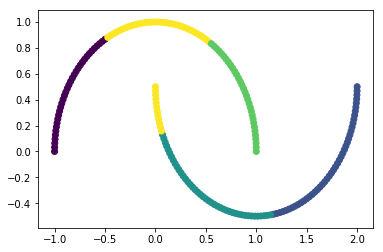

In [66]:
# create a scatter plot for inputData set with model labels color

plt.scatter(inputData1[0], inputData1[1], c = model.labels_)

#### finding right number of cluster

In [72]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

C:\Users\PREETI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


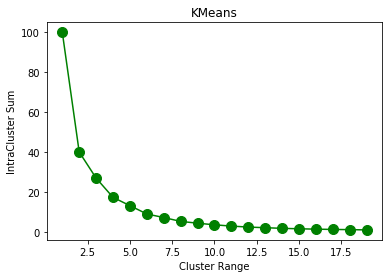

In [73]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()